In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('eda_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'eda_data.csv'

In [3]:
df.tail()

NameError: name 'df' is not defined

In [5]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Revenue','num_comp','hourly','employer_provided','job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]

In [6]:
df_model.head()

,avg_salary,Rating,Size,Type of ownership,Industry,Revenue,num_comp,hourly,employer_provided,job_state,same_state,age,python_yn,spark,aws,excel,job_simp,seniority,desc_len
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,$50 to $100 million (USD),0,0,0,NM,0,47,1,0,0,1,data scientist,na,2536
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),0,0,0,MD,0,36,1,0,0,0,data scientist,na,4783
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,$100 to $500 million (USD),0,0,0,FL,1,10,1,1,0,1,data scientist,na,3461
3,76.5,3.8,1001 to 5000 employees,Government,Energy,$500 million to $1 billion (USD),3,0,0,WA,1,55,1,0,0,0,data scientist,na,3883
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,3,0,0,NY,1,22,1,0,0,1,data scientist,na,2728


In [7]:
df_dum = pd.get_dummies(df_model)

In [9]:
from sklearn.model_selection import train_test_split

x=df_dum.drop('avg_salary', axis=1)
y=df_dum.avg_salary.values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [11]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [15]:
np.mean(cross_val_score(lm, x_train, y_train, scoring="neg_mean_absolute_error", cv=5))

-20.027537239360168

In [13]:
rmse_scores

array([29.11526691, 31.26399649, 28.81641811, 25.45274888, 26.88186638])

C:\Users\DEV\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 217.1791142783186, tolerance: 66.00192012048194
  model = cd_fast.enet_coordinate_descent(
C:\Users\DEV\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 656.2306196712889, tolerance: 63.949291346153856
  model = cd_fast.enet_coordinate_descent(


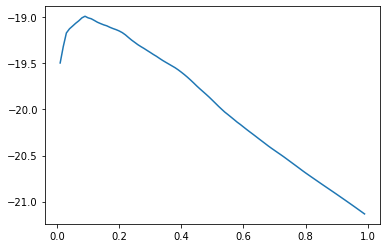

In [20]:
lml = Lasso()

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml, x_train, y_train, scoring="neg_mean_absolute_error", cv=5)))
plt.plot(alpha,error)

In [22]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
8,0.09,-18.988086


In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [26]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [36]:
some_data = x_train.iloc[:5]

In [37]:
rf.predict(some_data)

array([ 83.41,  69.87, 205.12,  97.  ,  74.59])

In [24]:
np.mean(cross_val_score(rf, x_train, y_train, scoring="neg_mean_absolute_error", cv=5))

-15.513677931292008

,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,spark,aws,excel,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
380,1.9,3,0,0,1,10,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
500,3.2,3,0,0,1,17,1,0,1,1,...,0,1,0,0,0,0,0,0,1,0
176,-1.0,0,0,1,0,3,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
571,3.6,0,0,0,0,169,0,1,1,1,...,0,0,0,0,0,0,1,0,1,0
642,3.7,0,0,0,0,26,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,3.6,0,0,0,1,93,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
106,4.7,3,0,0,0,8,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
270,3.7,3,0,0,0,239,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
435,4.7,0,0,0,1,10,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
